In [17]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

#data are available in the "../input/" directory

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error




In [112]:
data = pd.read_csv('gdp-vs-happiness.csv')
print(data.columns)
tmp_data = data.loc[ data['Year'] == 2001 ] 

print('number of missing data:')
print(tmp_data.isnull().sum())
tmp_data.describe(include='all')

Index(['Entity', 'Code', 'Year',
       'GDP per capita (constant 2011 international $)',
       ' Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best))',
       'Unnamed: 5'],
      dtype='object')
number of missing data:
Entity                                                                              0
Code                                                                               51
Year                                                                                0
GDP per capita (constant 2011 international $)                                     53
 Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best))    287
Unnamed: 5                                                                         45
dtype: int64


,Entity,Code,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5
count,287,236,287.0,234.000000,0.0,2.420000e+02
unique,287,236,NaN,NaN,NaN,NaN
top,Low income,MAR,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,2001.0,14182.715940,NaN,7.714002e+07
std,NaN,NaN,0.0,17611.103794,NaN,4.838937e+08
min,NaN,NaN,2001.0,545.851604,NaN,1.000000e+03
25%,NaN,NaN,2001.0,2700.242111,NaN,3.525000e+05
50%,NaN,NaN,2001.0,7528.972268,NaN,4.543500e+06
75%,NaN,NaN,2001.0,16660.571212,NaN,1.767500e+07


In [102]:
data.groupby('Region')[['GDP ($ per capita)']].median()

KeyError: 'Region'

In [70]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    else:
        values = [ float(str(x).replace(',','.')) for x in data[col] if str(x) != 'nan']
        average = np.average(values)
        data[col].loc[(data[col].isnull())] = average
        
print('number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

number of missing data:
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227,227,227,227,227.000000,227.000000,227.000000,227,227,227,227,227.000000,227.000000,227.000000,227.000000,227.000000
unique,227,11,NaN,NaN,219,151,158,221,NaN,141.000000,215.000000,204,163,210,7,221.000000,202.000000,151.000000,156.000000,168.000000
top,Egypt,SUB-SAHARAN AFRICA,NaN,NaN,"2,7","0,00",0,"9,95",NaN,82.838278,236.061435,0,0,100,2,22.114732,9.241345,0.150844,0.282711,0.565283
freq,1,51,NaN,NaN,2,44,62,3,NaN,18.000000,4.000000,9,28,8,111,3.000000,4.000000,15.000000,16.000000,15.000000
mean,NaN,NaN,2.874028e+07,5.982270e+05,NaN,NaN,NaN,NaN,9689.823009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,NaN,NaN,NaN,NaN,10026.881258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,NaN,NaN,NaN,NaN,5600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,NaN,NaN,NaN,NaN,15700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
fig, ax = plt.subplots(figsize=(16,6))
#top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
#mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
#gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP per capita (constant 2011 international $)') #, data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()



ValueError: Could not interpret input 'Country'

In [94]:
X = np.c_[ [float(str(x).replace(',','.')) for x in data['GDP ($ per capita)']]]
y = np.c_[ [float(str(x).replace(',','.')) for x in data['Industry']]]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#X = np.c_[data['GDP ($ per capita)']]
#y = np.c_[data['Industry']]

#print(X.shape)
#print(y.shape)

In [89]:
import sklearn

model = sklearn.linear_model.LinearRegression()

In [95]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
model.predict([[22587]])

array([[0.28099158]])

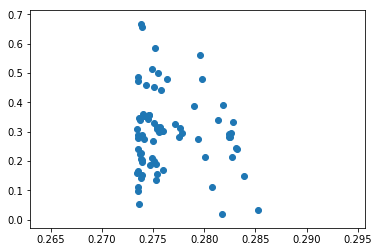

In [98]:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()

In [113]:
data.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita (constant 2011 international $)',
       ' Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best))',
       'Unnamed: 5'],
      dtype='object')

In [116]:
https://www.kaggle.com/stieranka/predicting-gdp-world-countries/data

SyntaxError: invalid syntax (<ipython-input-116-ea901673a977>, line 1)

In [117]:
https://ourworldindata.org/grapher/gdp-vs-happiness

SyntaxError: invalid syntax (<ipython-input-117-9bb68ed419c8>, line 1)